<a href="https://colab.research.google.com/github/matheusfabiao/Previsao-Vendas-Online/blob/main/PrevisaoVendasOnline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o módulo wget usando o gerenciador de pacotes pip
!pip3 install wget
# Baixando o arquivo CSV usando wget
!wget https://raw.githubusercontent.com/matheusfabiao/Previsao-Vendas-Online/main/online_shoppers_intention.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=242fa7d8c9717784862764f30d06d9435033d9ef644f1c21a1c2f31ff04f4157
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-11-28 00:31:04--  https://raw.githubusercontent.com/matheusfabiao/Previsao-Vendas-Online/main/online_shoppers_intention.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1059732 (1.0M) [text/plain]
Saving to: ‘online_shoppers_intention.csv’

online_shoppers_int 100%[===================>]   1.01M  --.-KB/s    in 0.07s   

2023-11-28 00:31:04 (15.0 MB/s) - ‘online_shoppers_intention.csv’ saved [1059732/1059732]



In [2]:
# Ignorar Avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando bibliotecas necessárias
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [4]:
# Lendo o arquivo CSV usando a biblioteca pandas e armazenando os dados em um DataFrame
data = pd.read_csv('online_shoppers_intention.csv')

# Fazendo uma cópia dos dados para manter a base original intacta
df = data.copy()

# Exibindo o DataFrame para visualizar os primeiros registros e entender a estrutura dos dados
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Verificando o shape dos dados
df.shape

(12330, 18)

In [6]:
# Verificando o tipo dos dados
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# Verificando valores nulos
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Verificando valores únicos em cada variável
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
'''
Dividindo os dados em variáveis categóricas e contínuas.
Trataremos todas as variáveis com menos de 30 entradas únicas
como variáveis categóricas.
'''

# Criando listas vazias para os resultados
continuous = []
categorical = []

# Realizar um loop pelas colunas
for column in df.columns[:-1]:
  if df.nunique()[column] >= 30:
    continuous.append(column)
  else:
    categorical.append(column)

In [10]:
# Variáveis Contínuas
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0.0,0.0,10,627.500000,0.02,0.05,0.0


In [11]:
# Variáveis Categóricas
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


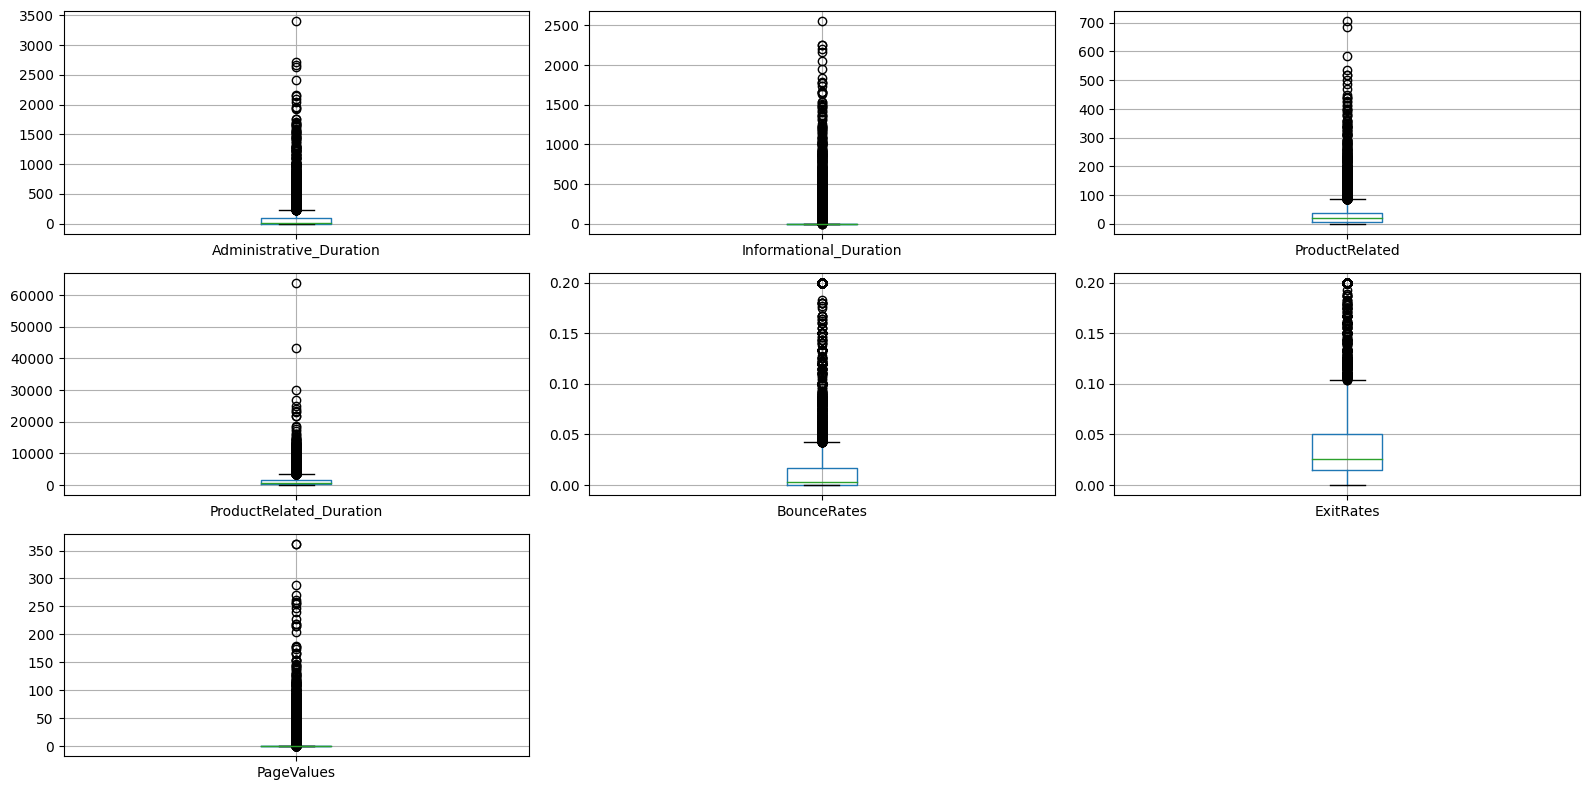

In [12]:
# Plotando das variáveis contínuas

# Definindo o tamanho da área de plotagem
plt.figure(figsize=(16, 8))

# Realizando loop pelas variáveis contínuas
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  df.boxplot(col);
  plt.tight_layout()

# Salvando a imagem dos BoxPlots
plt.savefig('boxplot1.png')

In [13]:
# Transformação logarítimica nas variáveis contínuas
# pois apresentam muita distorção (outliers)
df[continuous] = np.log1p(1 + df[continuous])

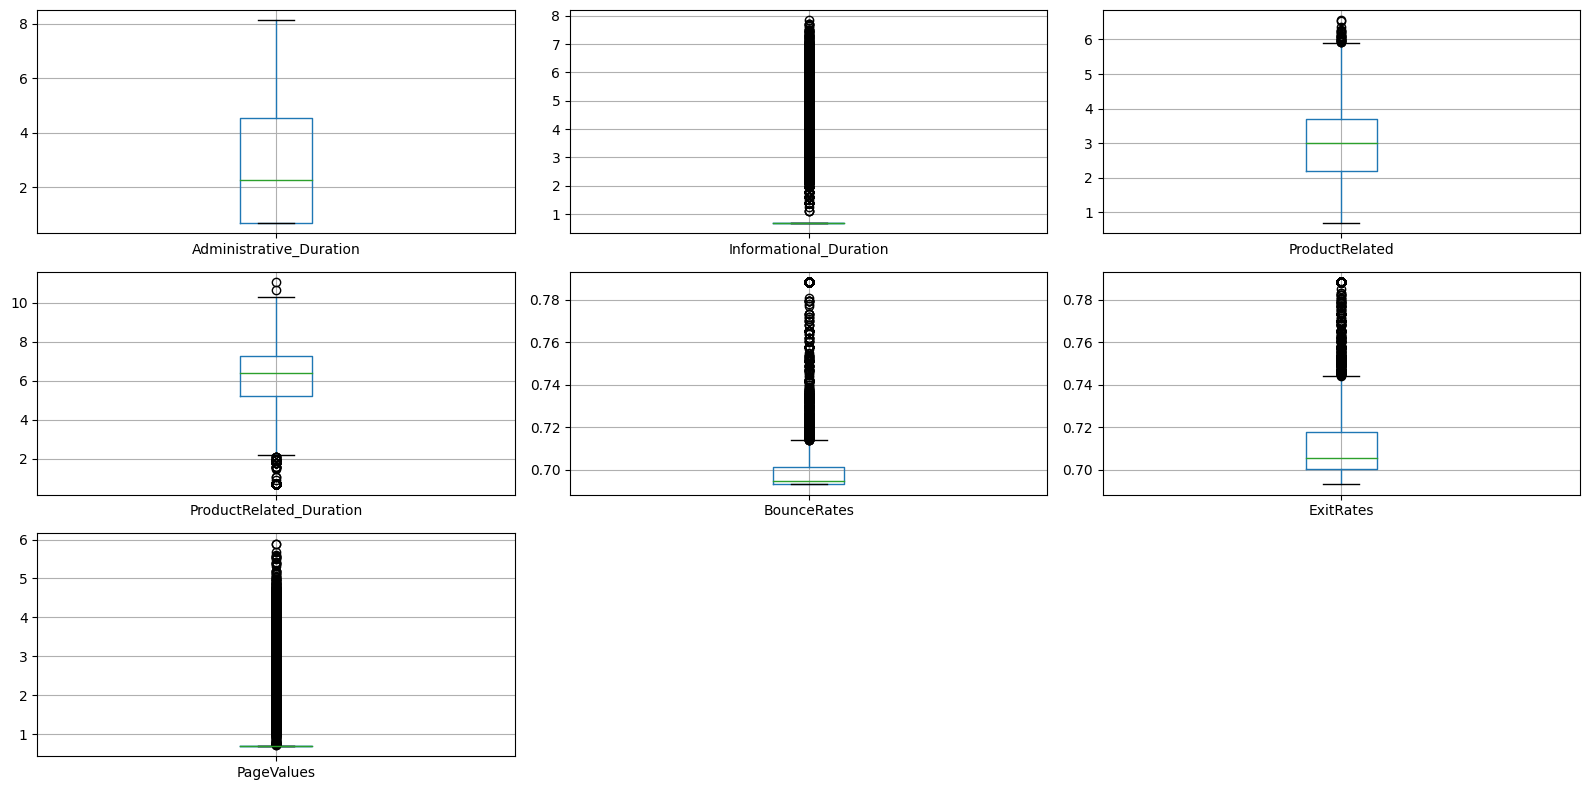

In [14]:
# Plotando das variáveis contínuas após transformação

# Definindo o tamanho da área de plotagem
plt.figure(figsize=(16, 8))

# Realizando loop pelas variáveis contínuas
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  df.boxplot(col);
  plt.tight_layout()

# Salvando a imagem dos BoxPlots
plt.savefig('boxplot2.png')

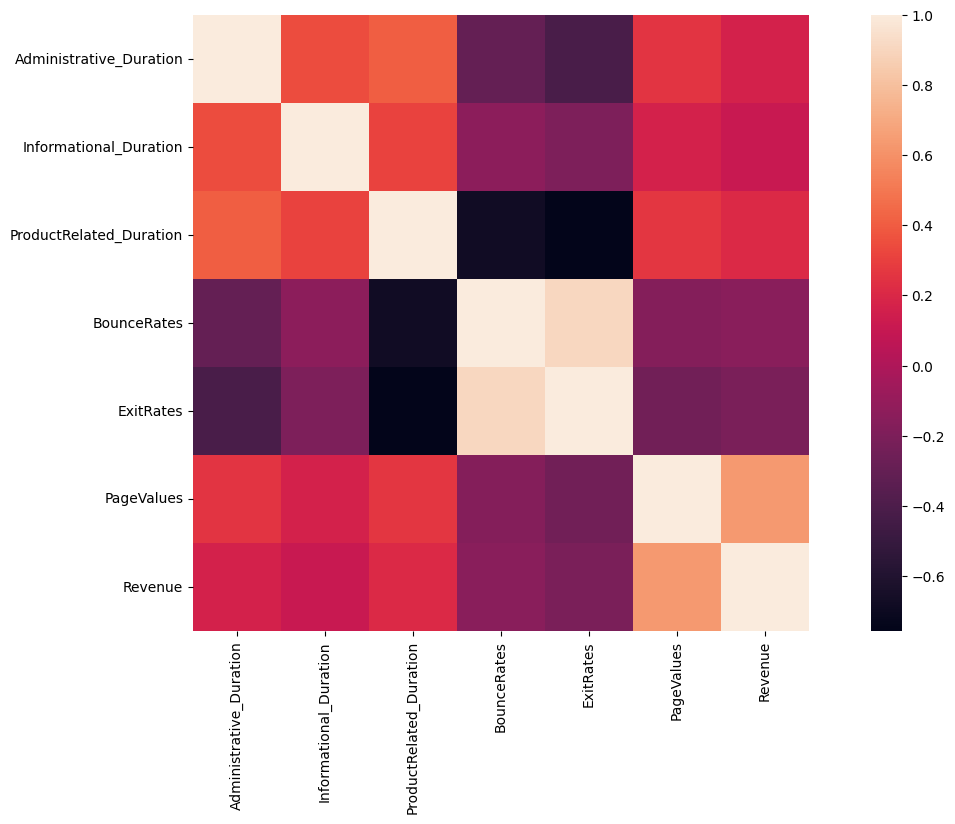

In [15]:
# Área de plotagem da matriz de correlação
plt.figure(figsize=(16, 8))

# Matriz de Correlação
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax=1, square=True)
plt.show()

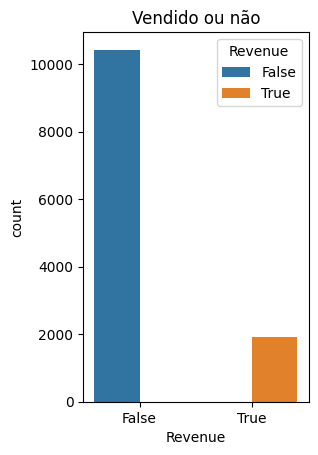

In [16]:
# Countplot de venda ou não venda

plt.subplot(1, 2, 2)
plt.title('Vendido ou não')
sns.countplot(x='Revenue', data=df, hue='Revenue')
plt.show()

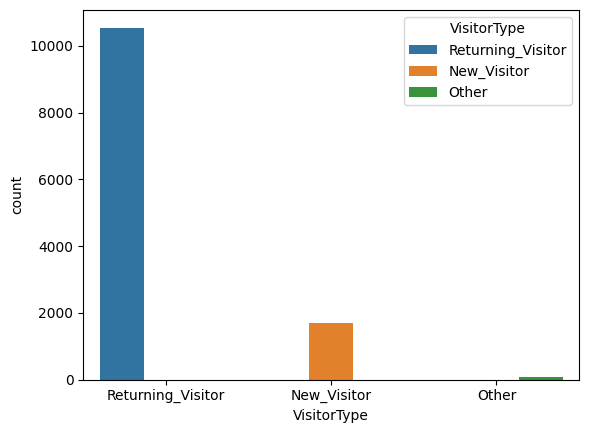

In [17]:
# Countplot do tipo de visitante
plt.xlabel('Tipo de Visitante')
sns.countplot(x='VisitorType', data=df, hue='VisitorType')
plt.show()

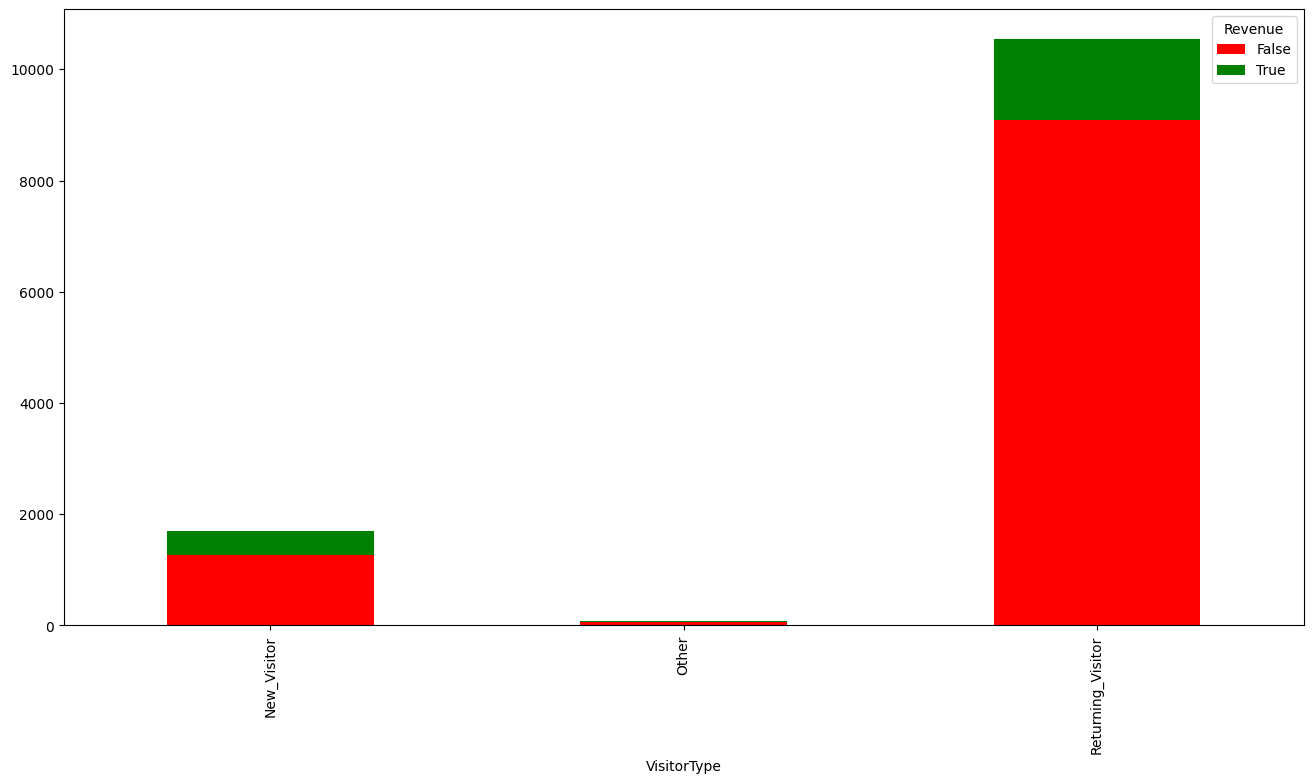

In [18]:
# Stacked Bar tipo de visitante x revenue
ct = pd.crosstab(df['VisitorType'], df['Revenue'])
ct.plot(kind='bar', stacked=True, figsize=(16, 8), color=['red', 'green'])
plt.show()

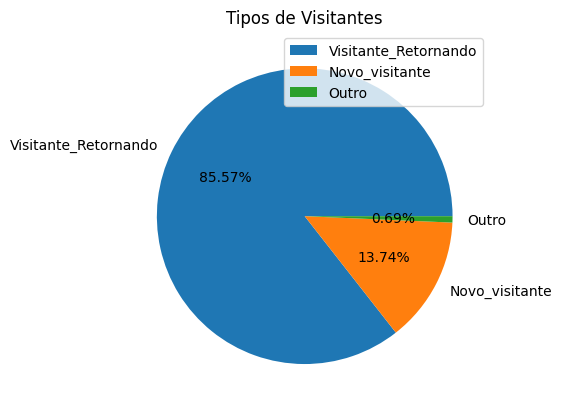

In [19]:
# Gráfico de pizza de tipos de visitantes
labels = ['Visitante_Retornando', 'Novo_visitante', 'Outro']
plt.title('Tipos de Visitantes')
plt.pie(df['VisitorType'].value_counts(), labels=labels, autopct='%.2f%%')
plt.legend()
plt.show()

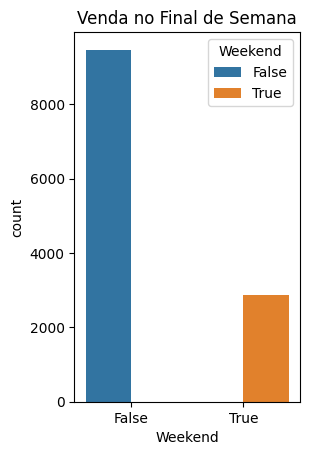

In [20]:
# Countplot se a venda foi realizada no fim de semana ou não
plt.subplot(1, 2, 1)
plt.title('Venda no Final de Semana')
sns.countplot(x='Weekend', data=df, hue='Weekend')
plt.show()

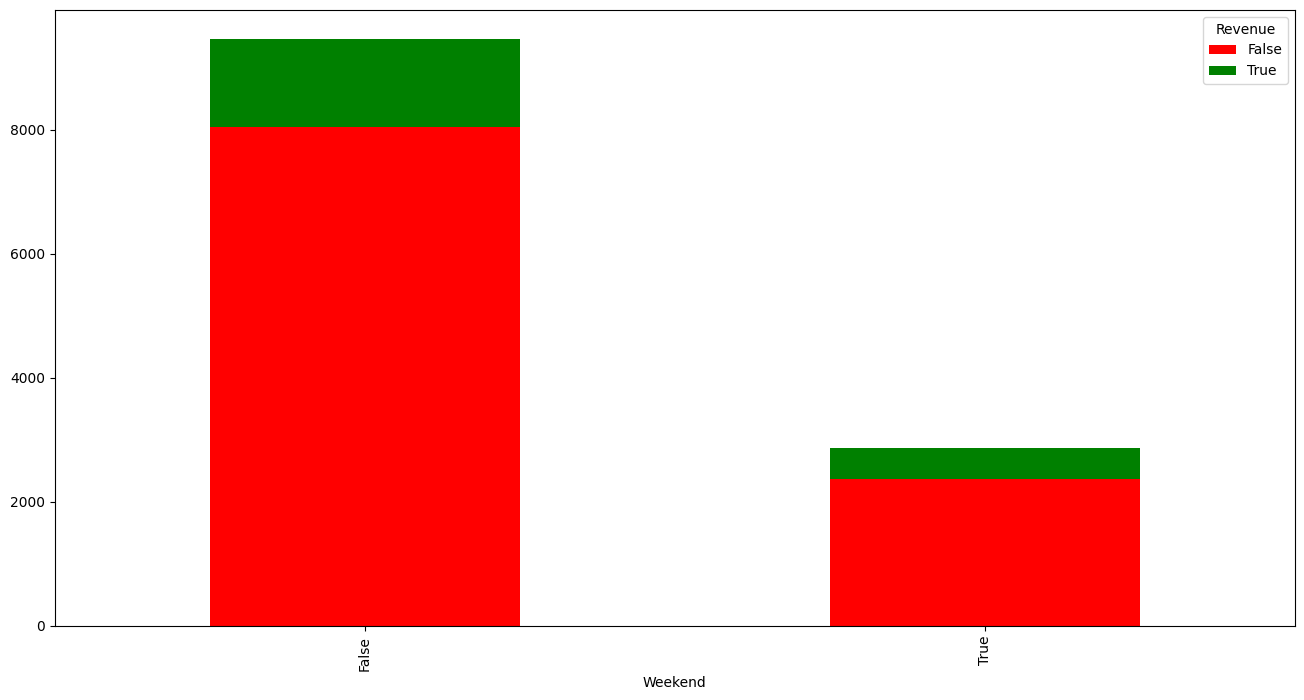

In [21]:
# Stacked Bar final de semana x revenue
ct = pd.crosstab(df['Weekend'], df['Revenue'])
ct.plot(kind='bar', stacked=True, figsize=(16, 8), color=['red', 'green'])
plt.show()

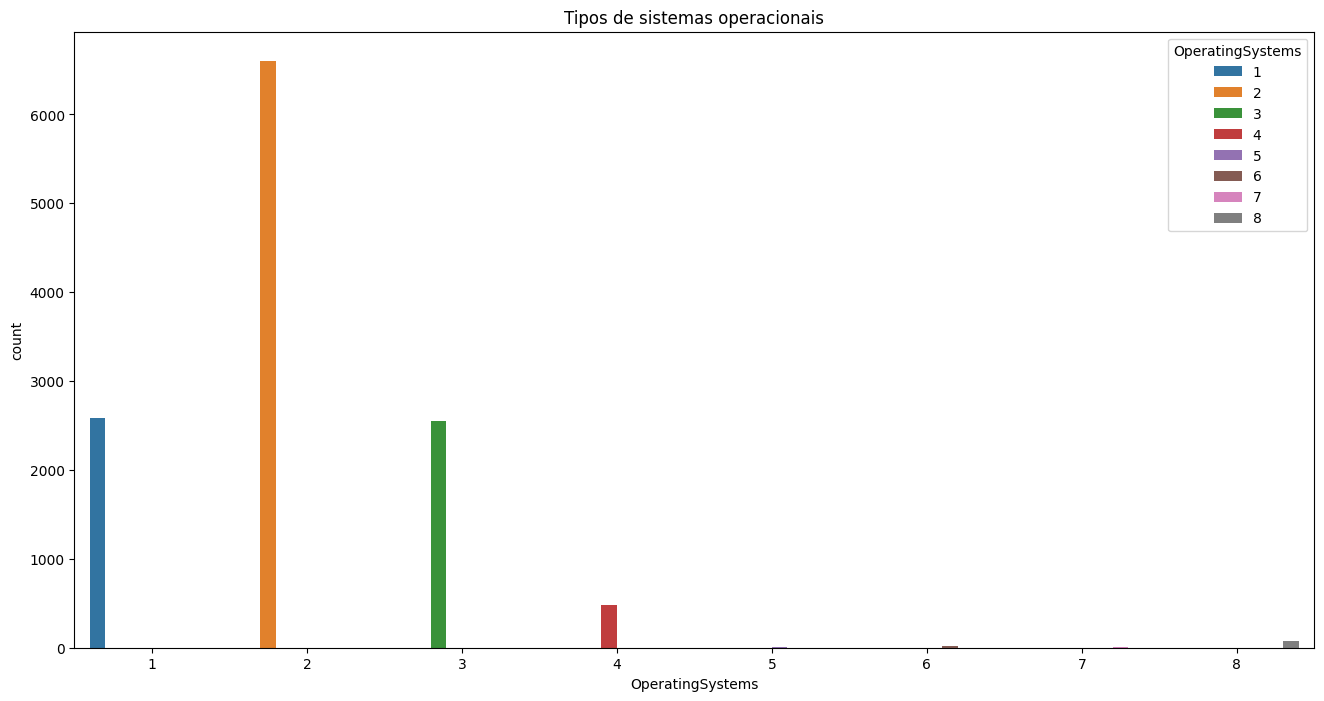

In [22]:
# Countplot tipos de sistemas operacionais
plt.figure(figsize=(16, 8))
plt.title('Tipos de sistemas operacionais')
plt.xlabel('Sistema Operacional Usado')
sns.countplot(x='OperatingSystems', data=df, hue='OperatingSystems')
plt.show()

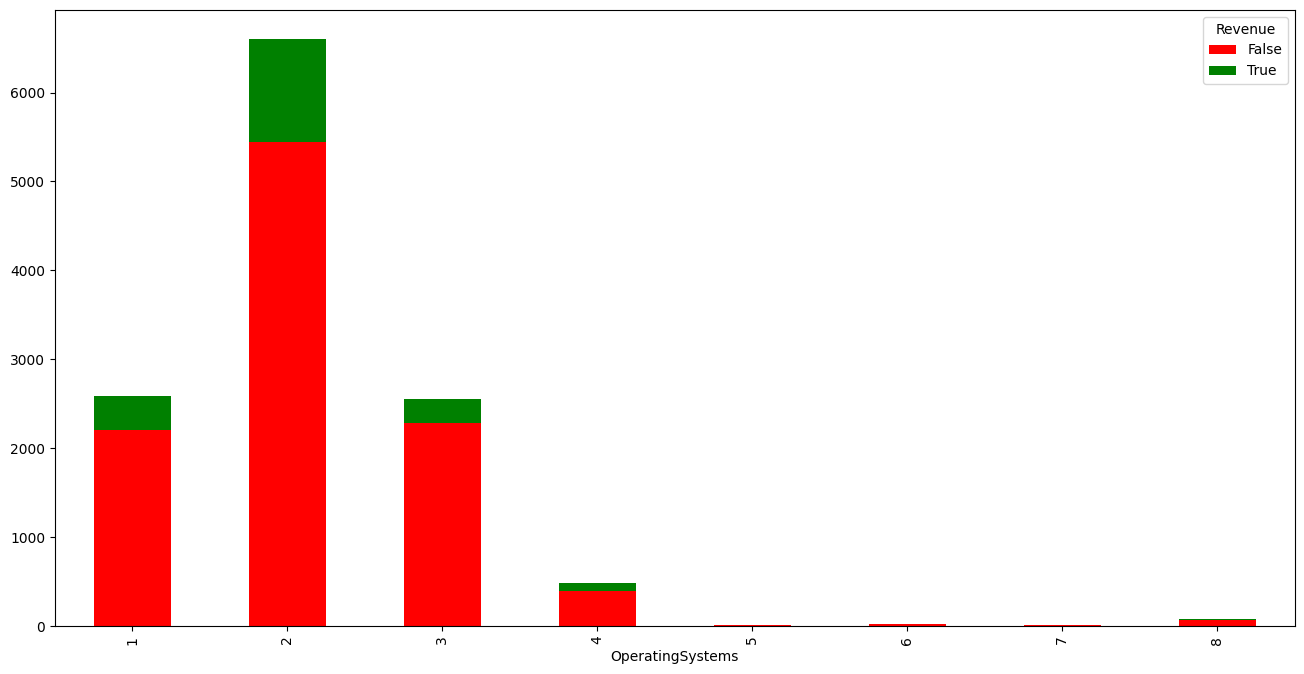

In [23]:
# Stacked Bar tipo de S.O x revenue
ct = pd.crosstab(df['OperatingSystems'], df['Revenue'])
ct.plot(kind='bar', stacked=True, figsize=(16, 8), color=['red', 'green'])
plt.show()

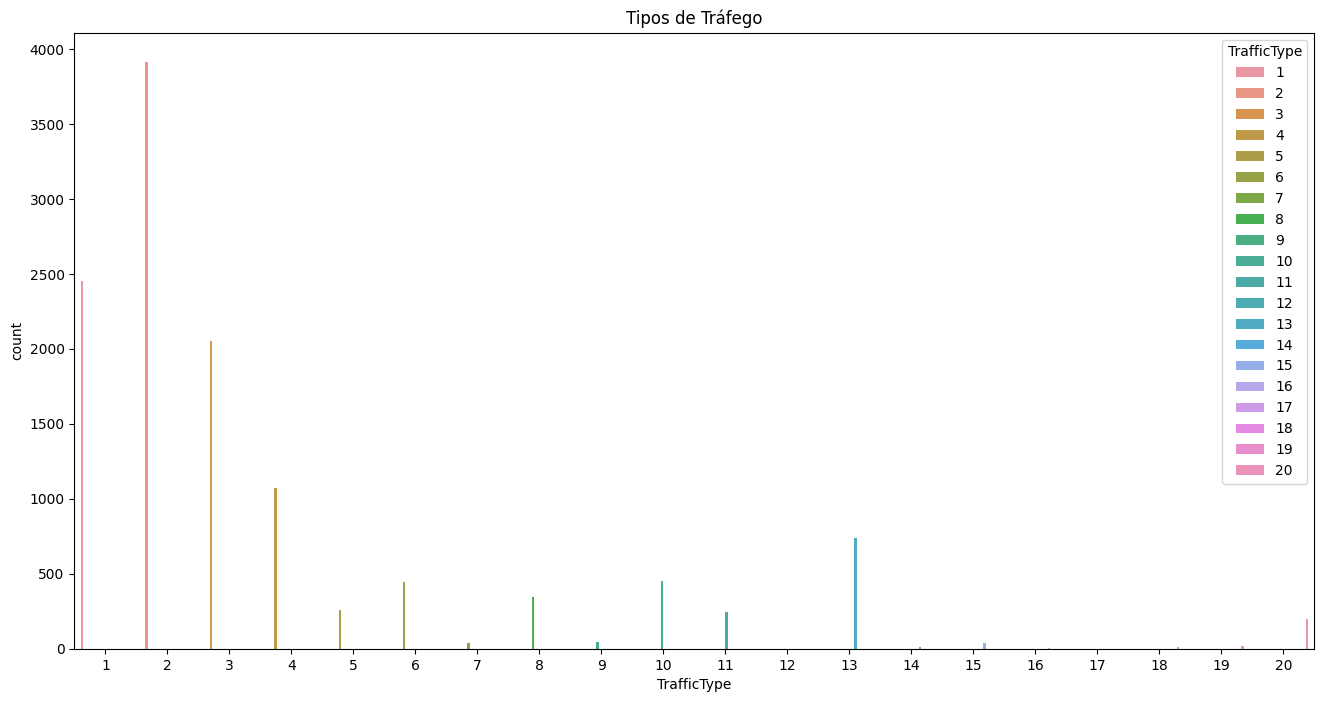

In [24]:
# Countplot dos tipos de tráfego
plt.figure(figsize=(16, 8))
plt.title('Tipos de Tráfego')
plt.xlabel('Tipo de Tráfego')
sns.countplot(x='TrafficType', data=df, hue='TrafficType')
plt.show()

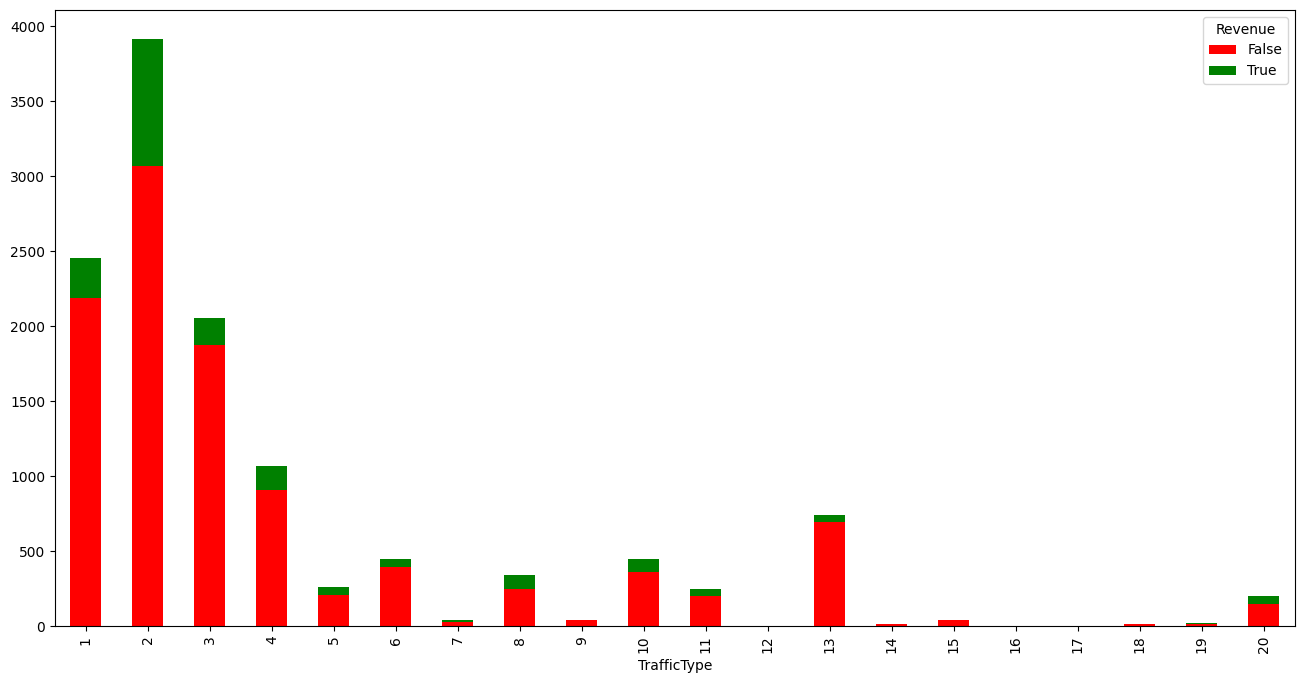

In [25]:
# Stacked Bar Tipos de Tráfego x Revenue
ct = pd.crosstab(df['TrafficType'], df['Revenue'])
ct.plot(kind='bar', stacked=True, figsize=(16, 8), color=['red', 'green'])
plt.show()

In [26]:
# Instaciando o encoder
le = LabelEncoder()

# Aplicando o encoder nas variáveis de tipo 'object'
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,1,1,1,1,2,False,False
1,0,0.693147,0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,2,2,2,1,2,2,False,False
2,0,0.693147,0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,4,1,9,3,2,False,False
3,0,0.693147,0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,2,3,2,2,4,2,False,False
4,0,0.693147,0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,2,3,3,1,4,2,True,False


In [28]:
# Verificando se a variável target está balanceada
target_count = df.Revenue.value_counts()
target_count

False    10422
True      1908
Name: Revenue, dtype: int64

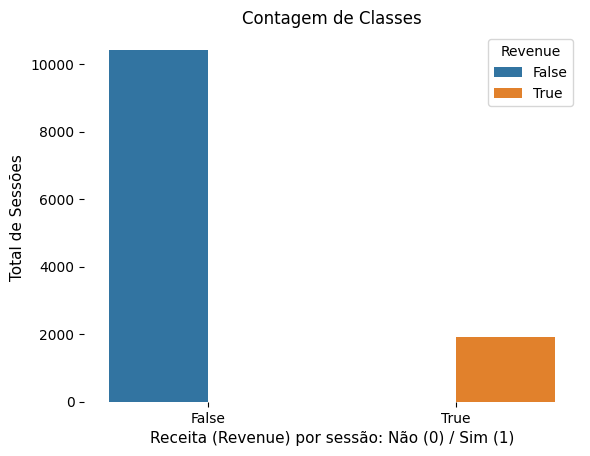

In [29]:
# Plotagem para melhor visualização da variável target
sns.countplot(x='Revenue', data=df, hue='Revenue')
plt.box(False)
plt.xlabel('Receita (Revenue) por sessão: Não (0) / Sim (1)', fontsize=11)
plt.ylabel('Total de Sessões', fontsize=11)
plt.title('Contagem de Classes')
plt.show()

In [30]:
df.shape

(12330, 18)

In [31]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Variáveis independentes
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [32]:
# Instanciando o balanceador SMOTE
smote = SMOTE(random_state=seed)

X_res, y_res = smote.fit_resample(X, y)

In [33]:
y_res.value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64

In [34]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [35]:
# Criando o modelo de SVM
model_v1 = SVC(kernel='linear')

In [36]:
# Treinamento do modelo
start = time()
model_v1.fit(X_train, y_train)
end = time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 75.51578211784363


In [37]:
# Previsões
predictions_v1 = model_v1.predict(X_test)

In [38]:
# Definição de métricas
precision = precision_score(y_test, predictions_v1)
recall = recall_score(y_test, predictions_v1)
f1 = f1_score(y_test, predictions_v1)
accuracy = accuracy_score(y_test, predictions_v1)
auc = roc_auc_score(y_test, predictions_v1)

# Dicionário de métricas e metadados
SVM_dict_v1 = {'Model': 'SVM',
               'Version': '1',
               'Kernel': 'Linear',
               'Precision': precision,
               'Recall': recall,
               'F1_Score': f1,
               'Accuracy': accuracy,
               'AUC': auc
               }

In [39]:
# Exibir os resultados na tela
print('Avaliação do Modelo:\n')
SVM_dict_v1

Avaliação do Modelo:



{'Model': 'SVM',
 'Version': '1',
 'Kernel': 'Linear',
 'Precision': 0.8818520489622139,
 'Recall': 0.7864261983863313,
 'F1_Score': 0.831409934771701,
 'Accuracy': 0.8388102662508995,
 'AUC': 0.8393818673793927}

In [40]:
# Modelo com Kernel Linear e Dados Padronizados (Scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Criando o Modelo V2 (Com os dados padronizados)
model_v2 = SVC(kernel='linear')

In [42]:
# Treinamento do modelo
start = time()
model_v2.fit(X_train_scaled, y_train)
end = time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 16.966552257537842


In [43]:
# Previsões
predictions_v2 = model_v2.predict(X_test_scaled)

In [44]:
# Definição de métricas
precision = precision_score(y_test, predictions_v2)
recall = recall_score(y_test, predictions_v2)
f1 = f1_score(y_test, predictions_v2)
accuracy = accuracy_score(y_test, predictions_v2)
auc = roc_auc_score(y_test, predictions_v2)

# Dicionário de métricas e metadados
SVM_dict_v2 = {'Model': 'SVM',
               'Version': '2',
               'Kernel': 'Linear Padronizado',
               'Precision': precision,
               'Recall': recall,
               'F1_Score': f1,
               'Accuracy': accuracy,
               'AUC': auc
               }

In [45]:
# Exibir os resultados na tela
print('Avaliação do Modelo:\n')
SVM_dict_v2

Avaliação do Modelo:



{'Model': 'SVM',
 'Version': '2',
 'Kernel': 'Linear Padronizado',
 'Precision': 0.8815719596388741,
 'Recall': 0.7878500237304225,
 'F1_Score': 0.8320802005012532,
 'Accuracy': 0.8392899976013433,
 'AUC': 0.83985129702525}

In [46]:
# Criando o Modelo V2 com otimização de hiperparâmetros, GridSearch e Kernel RBF
model_v3 = SVC(kernel='rbf')

In [47]:
# Valores para o Grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

In [48]:
# GridSearch
model_v3_grid_search_rbf = GridSearchCV(model_v3, svm_param_grid, cv=3)

In [49]:
# Treinamento do Modelo
start = time()
model_v3_grid_search_rbf.fit(X_train_scaled, y_train)
end = time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

Tempo de Treinamento do Modelo com Grid Search: 186.02743864059448


In [50]:
# Acurácia do Modelo
print(f'Acurácia no Treinamento: {model_v3_grid_search_rbf.best_score_:.2f}%')
print(f'Hiperparâmetros Ideais: {model_v3_grid_search_rbf.best_params_}')

Acurácia no Treinamento: 0.87%
Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [51]:
# Previsões
predictions_v3 = model_v3_grid_search_rbf.predict(X_test_scaled)

In [52]:
# Definição de métricas
precision = precision_score(y_test, predictions_v3)
recall = recall_score(y_test, predictions_v3)
f1 = f1_score(y_test, predictions_v3)
accuracy = accuracy_score(y_test, predictions_v3)
auc = roc_auc_score(y_test, predictions_v3)

# Dicionário de métricas e metadados
SVM_dict_v3 = {'Model': 'SVM',
               'Version': '3',
               'Kernel': 'RBF Padronizado',
               'Precision': precision,
               'Recall': recall,
               'F1_Score': f1,
               'Accuracy': accuracy,
               'AUC': auc
               }

In [53]:
# Exibir os resultados na tela
print('Avaliação do Modelo:\n')
SVM_dict_v3

Avaliação do Modelo:



{'Model': 'SVM',
 'Version': '3',
 'Kernel': 'RBF Padronizado',
 'Precision': 0.8789653489507077,
 'Recall': 0.8547698149027053,
 'F1_Score': 0.8666987487969201,
 'Accuracy': 0.8671144159270808,
 'AUC': 0.8672491169566874}

In [54]:
# Criando o Modelo V4 com otimização de hiperparâmetros, GridSearch e Kernel RBF
model_v4 = SVC(kernel='poly')

In [55]:
# Valores para o Grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

# Grid de hiperparâmetros
svm_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

In [56]:
# GridSearch
model_v4_grid_search_poly = GridSearchCV(model_v4, svm_grid_poly, cv=3)

In [57]:
# Treinamento do Modelo
start = time()
model_v4_grid_search_poly.fit(X_train_scaled, y_train)
end = time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

Tempo de Treinamento do Modelo com Grid Search: 147.97552490234375


In [58]:
# Acurácia do Modelo
print(f'Acurácia no Treinamento: {model_v4_grid_search_poly.best_score_:.2f}%')
print(f'Hiperparâmetros Ideais: {model_v4_grid_search_poly.best_params_}')

Acurácia no Treinamento: 0.87%
Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [59]:
# Previsões
predictions_v4 = model_v4_grid_search_poly.predict(X_test_scaled)

In [60]:
# Definição de métricas
precision = precision_score(y_test, predictions_v4)
recall = recall_score(y_test, predictions_v4)
f1 = f1_score(y_test, predictions_v4)
accuracy = accuracy_score(y_test, predictions_v4)
auc = roc_auc_score(y_test, predictions_v4)

# Dicionário de métricas e metadados
SVM_dict_v4 = {'Model': 'SVM',
               'Version': '4',
               'Kernel': 'Poly Padronizado',
               'Precision': precision,
               'Recall': recall,
               'F1_Score': f1,
               'Accuracy': accuracy,
               'AUC': auc
               }

In [61]:
# Exibir os resultados na tela
print('Avaliação do Modelo:\n')
SVM_dict_v4

Avaliação do Modelo:



{'Model': 'SVM',
 'Version': '4',
 'Kernel': 'Poly Padronizado',
 'Precision': 0.881094527363184,
 'Recall': 0.840531561461794,
 'F1_Score': 0.8603351955307262,
 'Accuracy': 0.8620772367474214,
 'AUC': 0.862312337471925}

In [62]:
# Concatena todos os dicionários em um dataframe do Pandas
summary = pd.DataFrame({'SVM_Model_1':pd.Series(SVM_dict_v1),
                        'SVM_Model_2':pd.Series(SVM_dict_v2),
                        'SVM_Model_3':pd.Series(SVM_dict_v3),
                        'SVM_Model_4':pd.Series(SVM_dict_v4)})

# Exibir o Resumo dos Modelos na tela
summary

,SVM_Model_1,SVM_Model_2,SVM_Model_3,SVM_Model_4
Model,SVM,SVM,SVM,SVM
Version,1,2,3,4
Kernel,Linear,Linear Padronizado,RBF Padronizado,Poly Padronizado
Precision,0.881852,0.881572,0.878965,0.881095
Recall,0.786426,0.78785,0.85477,0.840532
F1_Score,0.83141,0.83208,0.866699,0.860335
Accuracy,0.83881,0.83929,0.867114,0.862077
AUC,0.839382,0.839851,0.867249,0.862312


In [63]:
# Documentação Oficial do Scikit-Learn
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html